<a href="https://colab.research.google.com/github/chobocoding/python/blob/main/DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 출처 : https://data-marketing-bk.tistory.com/44 ##

# DFS(Depth First Search) : 기본 개념
DFS란 Depth First Search의 약자로서 그래프 자료에서 데이터를 탐색하는 알고리즘이다.
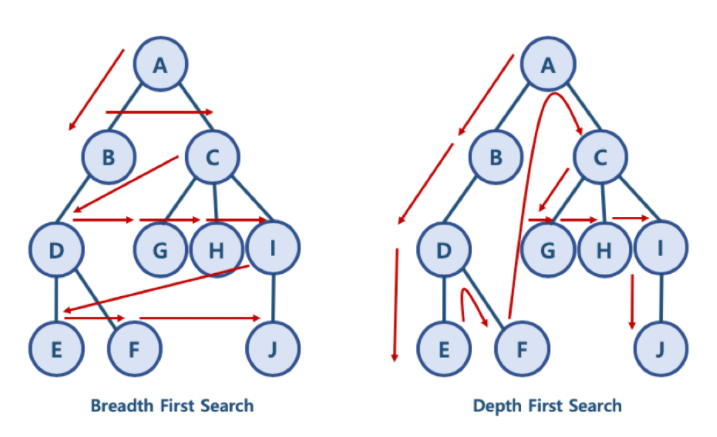

위 그림을 보면 알 수 있듯이 DFS는 깊이를 우선으로 탐색하는 알고리즘이다.

In [1]:
graph = dict()

graph['A'] = ['B', 'C']
graph['B'] = ['A', 'D']
graph['C'] = ['A', 'G', 'H', 'I']
graph['D'] = ['B', 'E', 'F']
graph['E'] = ['D']
graph['F'] = ['D']
graph['G'] = ['C']
graph['H'] = ['C']
graph['I'] = ['C', 'J']
graph['J'] = ['I']

# DFS의 기본 원칙
DFS에서 데이터를 찾을 때는 항상 앞으로 찾아가야할 노드와 이미 방문한 노드를 기준으로 데이터 탐색을 진행한다.

# DFS의 구현 방식
1. 스택/큐

2. 재귀 함수

In [4]:
# 1. 스택/ 큐를 활용한 DFS 구현
def dfs(graph, start_node):
 
    ## 기본은 항상 두개의 리스트를 별도로 관리해주는 것
    need_visited, visited = list(), list()
 
    ## 시작 노드를 시정하기 
    need_visited.append(start_node)
    
    ## 만약 아직도 방문이 필요한 노드가 있다면,
    while need_visited:
 
        ## 그 중에서 가장 마지막 데이터를 추출 (스택 구조의 활용)
        node = need_visited.pop()
        
        ## 만약 그 노드가 방문한 목록에 없다면
        if node not in visited:
 
            ## 방문한 목록에 추가하기 
            visited.append(node)
 
            ## 그 노드에 연결된 노드를 
            need_visited.extend(graph[node])
            
    return visited

In [5]:
dfs(graph, 'A')

['A', 'C', 'I', 'J', 'H', 'G', 'B', 'D', 'F', 'E']

In [7]:
# deque로 구현

def dfs2(graph, start_node):
    ## deque 패키지 불러오기
    from collections import deque
    visited = []
    need_visited = deque()
    
    ##시작 노드 설정해주기
    need_visited.append(start_node)
    
    ## 방문이 필요한 리스트가 아직 존재한다면
    while need_visited:
        ## 시작 노드를 지정하고
        node = need_visited.popleft()
 
        ##만약 방문한 리스트에 없다면
        if node not in visited:
 
            ## 방문 리스트에 노드를 추가
            visited.append(node)
            ## 인접 노드들을 방문 예정 리스트에 추가
            need_visited.extend(graph[node])
                
    return visited

In [8]:
dfs2(graph, 'A')

['A', 'B', 'C', 'D', 'G', 'H', 'I', 'E', 'F', 'J']

In [9]:
# 2. 재귀함수 활용

def dfs_recursive(graph, start, visited = []):
## 데이터를 추가하는 명령어 / 재귀가 이루어짐 
    visited.append(start)
 
    for node in graph[start]:
        if node not in visited:
            dfs_recursive(graph, node, visited)
    return visited

In [10]:
dfs_recursive(graph, 'A')

['A', 'B', 'D', 'E', 'F', 'C', 'G', 'H', 'I', 'J']